<a href="https://colab.research.google.com/github/microprediction/timeseries-notebooks/blob/main/pydlm_hello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pydlm

In [ ]:
!pip install microprediction

# Hello world example
See https://www.microprediction.com/blog/popular-timeseries-packages for more packages

In [17]:
from microprediction import MicroReader
mr = MicroReader()
YS = mr.get_lagged_values(name='emojitracker-twitter-face_with_medical_mask.json')[:100]

In [18]:
from pydlm import dlm, trend, seasonality
def run(ys:[float])->[float]:
     """ Compute list of priors for observations ys """
     model = dlm([],printInfo=False) + trend(1) + seasonality(24)
     xs = [0] # First guess doesn't matter
     for t,y in enumerate(ys[:-1]):
        model.append([y])
        model.fitForwardFilter()
        x_mean,x_var = model.predict()
        xs.append(x_mean[0,0])
     return xs
XS = run(YS)
len(XS)


100

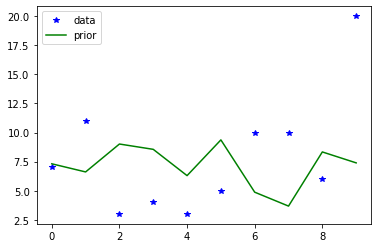

In [19]:
import matplotlib.pyplot as plt
plt.plot(YS[75:85],'*b')
plt.plot(XS[75:85],'g')
plt.legend(['data','prior'])